**Examples of Computer Vision**

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)

__PyTorch workflow for the computer vision problem__

![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

### FashionMNIST

In [2]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

**Loading Dataset**

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`. Including FashionMNIST in `torchvision.datasets.FashionMNIST()`.

To download it, we provide the following parameters:

    1. root: str - which folder do you want to download the data to?
    2. train: Bool - do you want the training or test split?
    3. download: Bool - should the data be downloaded?
    4. transform: torchvision.transforms - what transformations would you like to do on the data?
    5. target_transform - you can transform the targets (labels) if you like too.

__Using device agnostic code__

In [3]:
# downloadng training and testing data

train_data = datasets.FashionMNIST(
    root = 'data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 307kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.2MB/s]


Once you run above cell, it will genrate following output

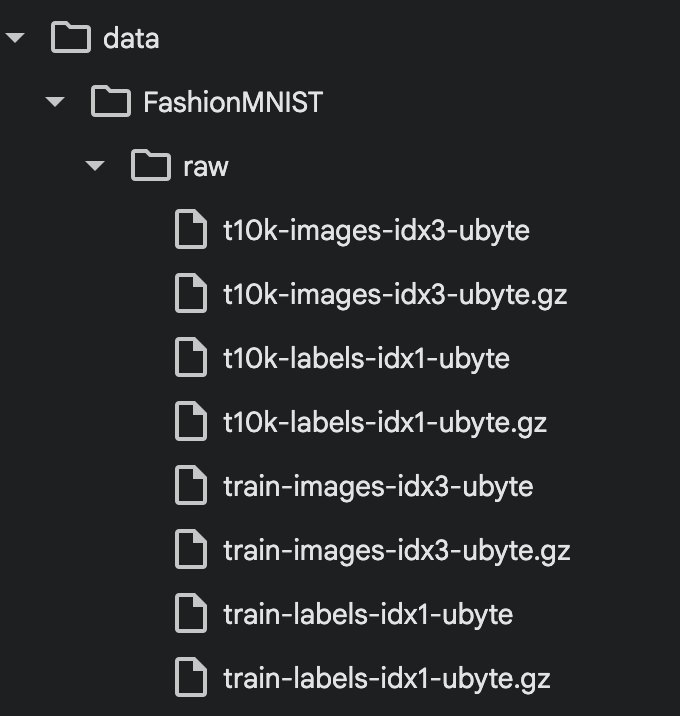

In [8]:
print(train_data)
print('\n')
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [17]:
image, label = train_data[0]

print(image.shape, image.ndim)
print(label)

torch.Size([1, 28, 28]) 3
9


![](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

In [4]:
classes = train_data.classes
print(classes )
print(train_data.class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


__Let's viz few images__

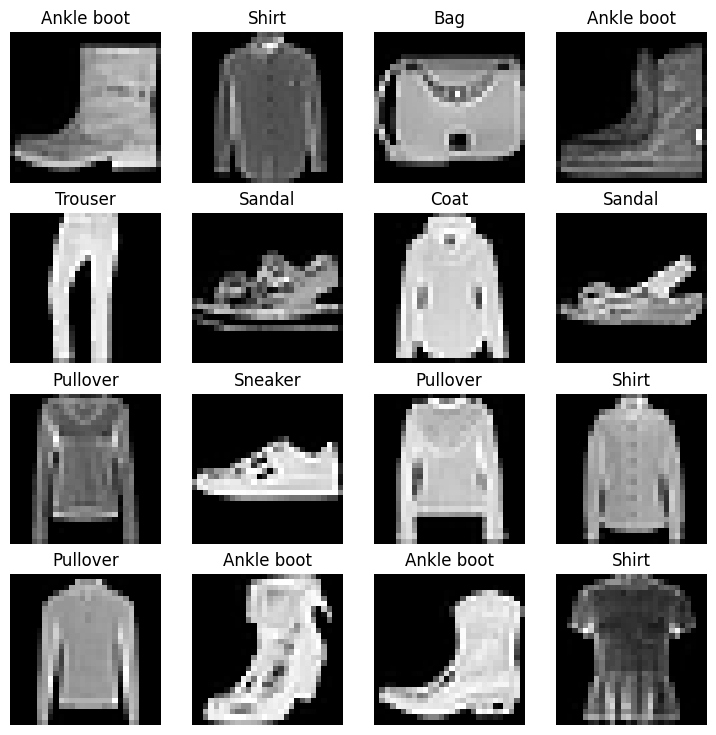

In [5]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols =  4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()   # creating a random index to sample the data from train_data object
  image, target = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(classes[target])
  plt.axis(False)

__Preparing DataLoader__

`torch.utils.data.DataLoader` or DataLoader for short

The DataLoader does what you think it might do, It helps load data into a model.
For training and for inference. It turns a large Dataset into a Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the *batch_size* parameter.



In [6]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [7]:
1875 * 32, 313 * 32

(60000, 10016)

In [16]:
# Just checking in the data

print(len(next(iter(train_dataloader))[1]))
print(next(iter(train_dataloader))[1])

32
tensor([1, 4, 0, 3, 0, 9, 1, 5, 7, 7, 8, 5, 1, 7, 4, 9, 7, 2, 0, 2, 6, 5, 0, 6,
        5, 7, 9, 8, 0, 1, 4, 1])


In [17]:
train_feature_batch, train_lable_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_lable_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

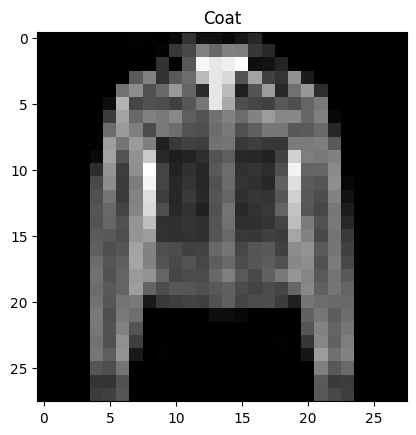

In [28]:
# Let's Viz one sampel from the batch data

random_index = torch.randint(0, len(train_feature_batch), size = [1]).item()
img, label = train_feature_batch[random_index], train_lable_batch[random_index]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(classes[label])
plt.show()

**Model Buidling**

We'll build a [TinyVGG](https://poloclub.github.io/cnn-explainer/) model

In [59]:
 """
 Model architecture : https://poloclub.github.io/cnn-explainer/
 """

class FashionMNISTVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
    super().__init__()

    self.block1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=1)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, out_features=output_shape)
    )

  def forward(self, x: torch.tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

In [60]:
torch.manual_seed(42)

model = FashionMNISTVGG(input_shape=1, hidden_units=10, output_shape=len(classes))

In [61]:
model

FashionMNISTVGG(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=10, bias=True)
  )
)

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [64]:
# getting some utilti functions

import requests
from pathlib import Path
from timeit import default_timer as timer


request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
    f.write(request.content)



def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [51]:
# defineing training and testing setup

from helper_functions import accuracy_fn


def training_step(model : torch.nn.Module,
                  data_loader : torch.utils.data.dataloader,
                  loss_fn : torch.nn.Module,
                  optimizer : torch.optim.Optimizer,
                  accuracy_fn,
                  ):

    train_loss, train_acc = 0, 0
    for batch, (X,y) in enumerate(data_loader):

        y_pred = model(X) # forward pass
        loss = loss_fn(y_pred, y) # calculating loss
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss /= len(data_loader)
        train_acc /= len(data_loader)
        print(f'train loss {train_loss} | train accuracy {train_acc}')


def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.dataloader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              ):

        test_loss, test_acc = 0, 0

        model.eval()
        with torch.inference_mode():
            for X,y in data_loader:

             test_pred = model(X) # forward pass
             test_loss += loss_fn(test_pred, y) # calculating loss
             test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

             test_loss /= len(data_loader)
             test_acc /= len(data_loader)
             print(f'train loss {test_loss} | train accuracy {test_acc}')

In [67]:
# Training and Testing Model

from timeit import default_timer as timer
from tqdm.auto import tqdm

train_time_start_model = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    training_step(model,
                  train_dataloader,
                  loss_fn,
                  optimizer,
                  accuracy_fn)

    test_step(model,
              test_dataloader,
              loss_fn,
              accuracy_fn)

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model, end=train_time_end_model)

  0%|          | 0/3 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
train loss 0.0003114432911388576 | train accuracy 0.04336001327989303
train loss 0.000199611546122469 | train accuracy 0.04835645867374928
train loss 0.00016586769197601825 | train accuracy 0.05002579011129267
train loss 0.00015362103295046836 | train accuracy 0.048360013754726025
train loss 0.00025422481121495366 | train accuracy 0.04669245867400253
train loss 8.939550025388598e-05 | train accuracy 0.05002490264462613
train loss 0.00015084835467860103 | train accuracy 0.048360013281410465
train loss 0.000389593536965549 | train accuracy 0.04002579200708342
train loss 0.00022417995205614716 | train accuracy 0.048354680422403776
train loss 0.00022147977142594755 | train accuracy 0.04335912249622528
train loss 0.00019239944231230766 | train accuracy 0.04835645819866465
train loss 0.00010663545253919438 | train accuracy 0.05002579011103929
train loss 0.0001620949333300814 | train accuracy 0.046693347088059216
train loss 6.826916069258004e

In [83]:
# Seting up evaluation code

def eval_model(model : torch.nn.Module,
                  data_loader : torch.utils.data.dataloader,
                  loss_fn : torch.nn.Module,
                  accuracy_fn):

    loss, acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {

        "model name" : model.__class__.__name__,
        "model loss" : loss.item(),
        "model acc"  : acc
    }

In [84]:
eval_model(model, test_dataloader, loss_fn, accuracy_fn)

{'model name': 'FashionMNISTVGG',
 'model loss': 0.31104913353919983,
 'model acc': 89.10742811501598}

In [69]:
# Model Evaluation on the test data

def make_predictions(model: torch.nn.Module, data: list):

    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:

            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)
            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

In [74]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


print(test_samples[0].shape, test_labels[0])

torch.Size([1, 28, 28]) 8


In [82]:
preds_prob = make_predictions(model=model, data=test_samples)
print(preds_prob[0])
print('\n')
pred_class = preds_prob.argmax(dim=1)
print(pred_class.numpy())
print('\n')
print(test_labels)

tensor([3.0718e-04, 1.0214e-06, 5.0269e-04, 1.0291e-07, 2.1788e-04, 4.8429e-04,
        3.0830e-04, 5.7401e-04, 9.9715e-01, 4.5568e-04])


[8 6 6 9 9 7 7 8 1]


[8, 6, 6, 9, 9, 7, 7, 8, 1]


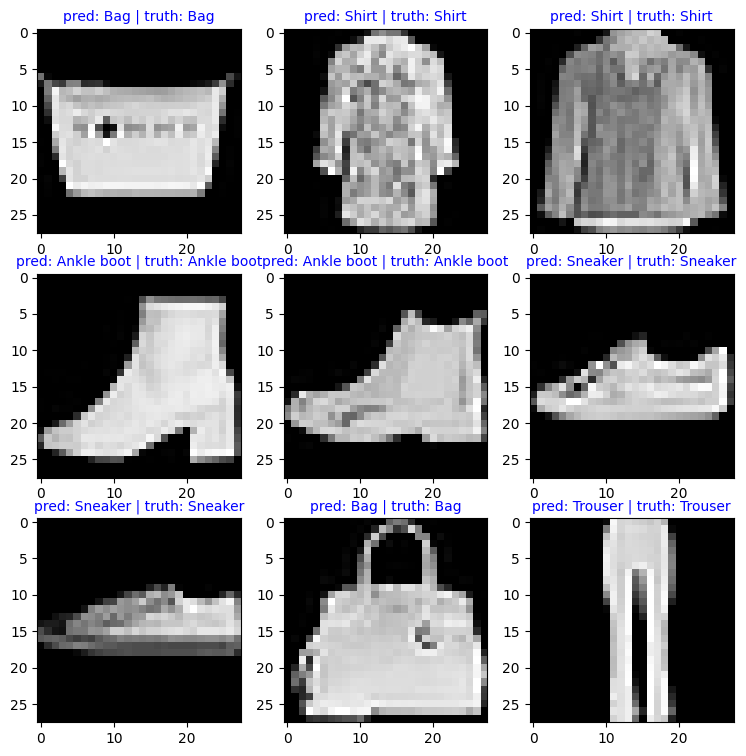

In [87]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = classes[pred_class[i]]
    truth_label = classes[test_labels[i]]

    title_text = f"pred: {pred_label} | truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10 ,c = 'b')
    else:
        plt.title(title_text, fontsize = 10, c='r')


__Making predictions on whole test data__

In [89]:
y_preds = []
model.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions'):

    y_logit = model(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_preds.append(y_pred)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [98]:
# currently prediciton are in batchs, let's push them into single tensor

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

tensor([0, 6, 1,  ..., 4, 5, 4])

__Plotting Confusion Metrics__

In [100]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 13.1 MB/s eta 0:00:00


In [101]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [106]:
confmat = ConfusionMatrix(num_classes=len(classes),
                          task = 'multiclass')

confmat_tensor = confmat(preds = y_preds_tensor,
                         target = test_data.targets)

confmat_tensor

tensor([[102, 102,  83,  98, 126,  94,  92, 112, 102,  89],
        [111,  91,  85, 107, 103, 121,  98,  99,  91,  94],
        [105,  93,  94, 103, 103, 102,  96,  88, 105, 111],
        [116, 116,  79,  90, 121,  94, 102, 100,  95,  87],
        [106, 100,  80,  98, 119,  92, 106, 111, 103,  85],
        [ 99,  98,  78,  89, 124, 105, 110,  93, 104, 100],
        [100, 104,  80, 105, 112,  96, 100, 108, 107,  88],
        [102,  96,  60, 100, 122,  93, 102, 124, 100, 101],
        [103,  93,  76, 101, 124,  91,  94, 111,  94, 113],
        [103, 108,  75, 102, 116,  95,  93, 107,  98, 103]])

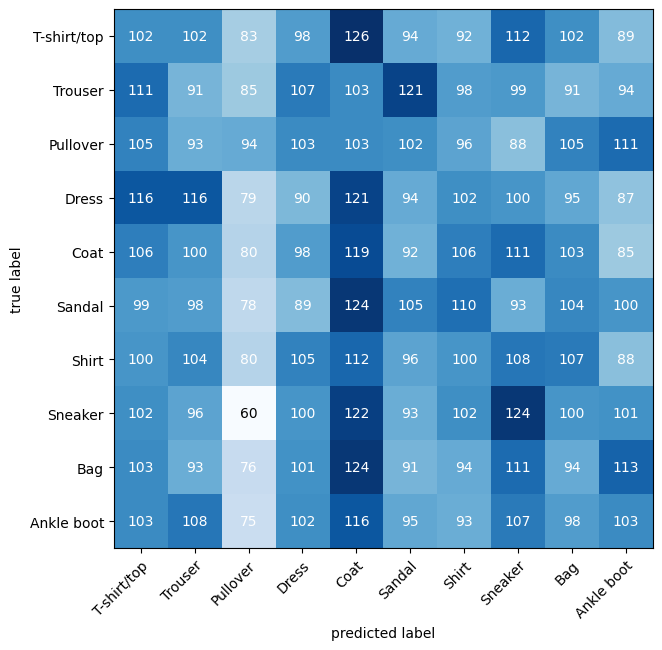

In [108]:
fig, ax = plot_confusion_matrix(

    conf_mat = confmat_tensor.numpy(),
    class_names = classes,
    figsize = (10,7)
)

----